# Partial Least Square Regression

Partial Least Square Regression is an analytical technique that can be used to predict the values of some unknown dependent variables from a independent variables. To build the model it initially requires a set of independent variables with the known values of the dependent variables <br><br>

Large amount of code copied from : https://towardsdatascience.com/partial-least-squares-f4e6714452a

### Required Packages:

fsspec <br>
s3fs <br>
boto <br>
pandas <br>
math <br>
sklean <br>
matplotlib

## Import Data

All data (training, validation, testing) is imported from a csv of format without the header or column names
<br>

|    | ind1 | ind2 | ind3 | ind4 | ind5 | ... | dep1 | dep2 | dep3 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| spectra 1 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | ... | 4.6 | 5.7 | 2.4 | 
| spectra 2 | 5.0 | 5.3 | 6.5 | 7.7 | 8.0 | ... | 4.5 | 5.1 | 2.3 | 
| spectra 3 | 4.3 | 5.6 | 6.5 | 7.0 | 8.1 | ... | 4.4 | 5.2 | 2.4 | 
| spectra 4 | 4.2 | 5.2 | 6.3 | 7.3 | 8.2 | ... | 4.7 | 5.7 | 2.7 | 
| spectra 5 | 4.6 | 4.9 | 6.3 | 7.4 | 8.5 | ... | 4.9 | 5.8 | 2.8 | 
| spectra 6 | 5.7 | 5.7 | 6.7 | 7.3 | 8.6 | ... | 4.6 | 5.8 | 2.9 | 



In [10]:
""" #Uncommment if you have not installed these packages in your python environment
%pip install fsspec
%pip install s3fs
%pip install boto
%pip install scikit-learn
"""

import pandas as pd
import boto

# import the csv file directly from an s3 bucket
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\SameRingPattern25,5,23\Pattern1 random integer percentages.csv"

# Limited variation to +/-10% and only 0,1,2,3 concentrations
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\MinBottlePeak\test of program.csv"

file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\SameRingPattern25,5,23\Pattern1 individual concentration normalised limited.csv"

#simulated data
file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\Simulated Ethanol and Methanol Spectra.csv"

file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\SameRingPattern25,5,23\Pattern1WindowedPCA'd.csv"

data = pd.read_csv(file, header = 0)

#data = pd.read_csv(file)
#data = data.drop('Unnamed: 0', axis = 1)

data

,503.65,507.62,511.57,515.53,519.48,523.43,527.37,531.31,535.25,539.18,...,1484.2,1487.3,1490.4,1493.5,1496.6,1499.7,1502.7,Ethanol,Methanol,MilliQ
0,16.822618,15.961567,16.327813,15.872644,15.383990,16.025345,16.698202,16.672047,16.435297,16.076031,...,42.270126,41.268654,39.825198,37.996478,36.819155,35.284508,33.343826,40,3.0,57.0
1,17.672417,17.027455,16.614598,15.228606,14.855443,14.550922,14.346868,14.524430,15.401763,15.597855,...,42.851697,42.390511,41.227111,40.242544,38.781653,36.899832,35.272678,40,3.0,57.0
2,16.668385,16.742069,16.682644,17.042650,16.217097,15.696903,15.644923,15.051590,15.768242,15.440034,...,43.133080,42.715795,41.735877,40.324890,38.543783,36.317387,33.763787,40,3.0,57.0
3,16.663110,15.975944,16.219059,15.241008,15.448488,15.888163,15.960253,16.582720,16.871900,15.872687,...,42.065445,41.181612,40.405113,38.728396,37.390371,35.456661,33.152579,40,3.0,57.0
4,17.862142,16.669106,16.271847,16.066039,15.289227,15.031220,15.422898,15.606042,16.628690,16.817633,...,42.557914,41.731666,39.965438,39.144585,38.243664,37.829563,36.529910,40,1.0,59.0
5,17.832252,17.267180,16.590292,15.772716,15.754584,15.667691,15.447503,16.213862,16.682612,16.145746,...,42.746044,42.263949,40.964688,39.895715,38.940689,37.586323,36.356941,40,1.0,59.0
6,18.903795,18.419522,18.312940,17.745552,17.550115,17.095924,17.116232,17.137950,16.837576,17.101098,...,43.675908,43.450177,42.565131,41.674371,40.063824,38.079870,36.594827,40,1.0,59.0
7,17.328693,17.478199,17.404321,17.216976,16.883089,15.947480,15.880108,16.255197,16.929591,17.378543,...,43.390695,42.488920,40.827593,38.929637,38.187244,36.705495,35.137576,40,1.0,59.0
8,18.498866,18.721750,18.903824,18.677468,18.060550,17.178356,17.055006,15.724955,15.445205,15.733717,...,44.669217,43.999492,42.142871,41.299805,40.407803,38.817826,37.634251,40,0.4,59.6
9,18.990174,18.474696,19.082755,19.064686,19.074218,18.417112,17.385667,17.094363,17.553772,18.291701,...,48.690096,48.025152,46.613282,44.388915,42.203149,40.733450,38.547992,40,0.4,59.6


## Split the data into training, validation, and test data

Depending on the amount of data, split it into training, validation and test data

In [11]:

# Split data in train, val, test, ensue that they add to 100
#percentage_train =  56
#percentage_validation = 23
#percentage_test = 21

percentage_train =  60
percentage_validation = 20
percentage_test = 20

num_depen_var = 3

train_cut_off = (int)(len(data) * percentage_train/100)
val_cut_off = (int)(len(data) * (percentage_train+percentage_validation)/100)


train = data.iloc[0:train_cut_off,:]
val = data.iloc[train_cut_off:val_cut_off,:]
#val = data.iloc[0:train_cut_off,:]
test = data.iloc[val_cut_off:len(data),:]
#test = data.iloc[(int(len(data)/2)):len(data),:]

#train = data.iloc[0:20,:]
#val = data.iloc[20:29,:]
#test = data.iloc[29:36]


# Split the columns in X and Y
X_colnames = data.columns[:-num_depen_var]
Y_colnames = data.columns[-num_depen_var:]

# Split each train, val and test into two arrays
X_train = train[X_colnames].values
Y_train = train[Y_colnames].values

X_val = val[X_colnames].values
Y_val = val[Y_colnames].values

X_test = test[X_colnames].values
Y_test = test[Y_colnames].values

### Different examples of using PLSRegression showing the number of components changes the accuracy of the PLSRegression

In [35]:
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=100, scale=True)
my_plsr.fit(X_train, Y_train)

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 87
  warnings.warn(f"Y residual is constant at iteration {k}")


PLSRegression(n_components=100)

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:110: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundatio

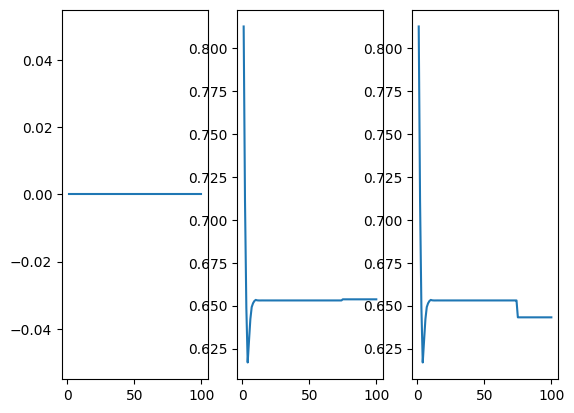

In [104]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Compute the validation error for each n_comp 
water_plot = []
fat_plot = []
protein_plot = []

for n_comp in range(1, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  water_rmse = sqrt(mean_squared_error(Y_val[:,0] ,preds[:,0]))
  fat_rmse = sqrt(mean_squared_error(Y_val[:,1] ,preds[:,1]))
  protein_rmse = sqrt(mean_squared_error(Y_val[:,2] ,preds[:,2]))
  
  water_plot.append( water_rmse)
  fat_plot.append( fat_rmse)
  protein_plot.append(protein_rmse)

# Create the three plots using matplotlib
fig, axs = plt.subplots(1,3)

axs[0].plot(range(1, 101), water_plot)
axs[1].plot(range(1, 101), fat_plot)
axs[2].plot(range(1, 101), protein_plot)

fig.show()

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCa

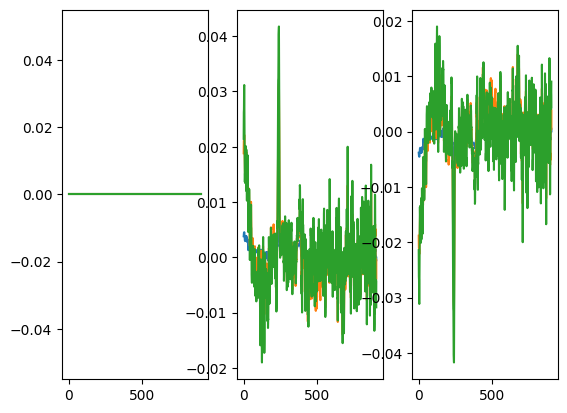

In [37]:
# Coefficients Plot

# fit and extract coefs for 1 comp
my_plsr = PLSRegression(n_components=1, scale=True)
my_plsr.fit(X_train, Y_train)

water_1comp = my_plsr.coef_[:,0]
fat_1comp = my_plsr.coef_[:,1]
protein_1comp = my_plsr.coef_[:,2]


# fit and extract coefs for 2 comps
my_plsr = PLSRegression(n_components=2, scale=True)
my_plsr.fit(X_train, Y_train)

water_2comp = my_plsr.coef_[:,0]
fat_2comp = my_plsr.coef_[:,1]
protein_2comp = my_plsr.coef_[:,2]


# fit and extract coefs for 3 comps
my_plsr = PLSRegression(n_components=3, scale=True)
my_plsr.fit(X_train, Y_train)

water_3comp = my_plsr.coef_[:,0]
fat_3comp = my_plsr.coef_[:,1]
protein_3comp = my_plsr.coef_[:,2]


# Plot in a graph for each y variable
fig, axs = plt.subplots(1, 3)

# water comps
axs[0].plot(water_1comp)
axs[0].plot(water_2comp)
axs[0].plot(water_3comp)

# fat comps
axs[1].plot(fat_1comp)
axs[1].plot(fat_2comp)
axs[1].plot(fat_3comp)

# protein comps
axs[2].plot(protein_1comp)
axs[2].plot(protein_2comp)
axs[2].plot(protein_3comp)

## Find the best number of components for the best R2 score

In [12]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=100, scale=True)
my_plsr.fit(X_train, Y_train)

best_ncomp = 1
my_plsr = PLSRegression(n_components=best_ncomp, scale=True)
my_plsr.fit(X_train, Y_train)
preds = my_plsr.predict(X_val)

best_r2 = r2_score(preds, Y_val)

for n_comp in range(2, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  r2 = r2_score(preds, Y_val)
  if r2 > best_r2:
    best_r2 = r2
    best_ncomp = n_comp

print(best_r2, best_ncomp)

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310

0.2531816823547726 37


C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310

## Run on the test data, getting the r2-score

In [17]:
best_model = PLSRegression(n_components=best_ncomp, scale=True)
#best_model = PLSRegression(n_components=15, scale=True)
best_model.fit(X_train, Y_train)
#test_preds = best_model.predict(X_test)
#print(r2_score(Y_test, test_preds))

#for i in range(len(test_preds)):
#    print(Y_test[i])
#    print(test_preds[i])

C:\Users\edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 27
  warnings.warn(f"Y residual is constant at iteration {k}")


PLSRegression(n_components=37)

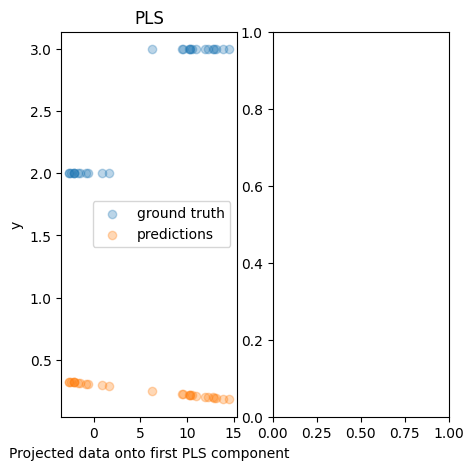

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(5, 5))

pls = PLSRegression(n_components=1)
pls.fit(X_train, Y_train)


axes[0].scatter(pls.transform(X_test)[:,0], Y_test[:,1], alpha=0.3, label="ground truth")
axes[0].scatter(pls.transform(X_test)[:,0], pls.predict(X_test)[:,1], alpha=0.3, label="predictions")
axes[0].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[0].legend()
plt.show()

## Calculate the values of dependent variables with the model

In [16]:
# import the csv file directly from an s3 bucket
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\Small Bottle Yes Rotation Minimal Bottle peaks in spectra random.csv"
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\Small Bottle No Rotation Minimal Bottle peaks in spectra.csv"
#file = r"C:\Users\edwar\OneDrive\Documents\University\Summer_2023_Internship\Data\Measuring Methanol\test of program.csv"
#data = pd.read_csv(file, header = 1)
#data = data.drop('Unnamed: 0', axis = 1)
#data

#num_depen_var = 3

# Split the columns in X and Y
#X_colnames = data.columns[:-num_depen_var]
#Y_colnames = data.columns[-num_depen_var:]

#unknown = data.iloc[:,:]

# Split each train, val and test into two arrays
#X_unknown = unknown[X_colnames].values
#Y_unknown = unknown[Y_colnames].values

#best_model = PLSRegression(n_components=best_ncomp, scale=True)
#best_model.fit(X_train, Y_train)
preds = best_model.predict(X_test)
#preds2 = best_model.predict(X_unknown)
#print(preds)
for i in range(len(preds)):
    print(i)
    print(Y_test[i])
    print(preds[i])
    #print(Y_unknown[i])
    #print(preds2[i])
    print("sum: " + str(sum(preds[i])))
    print("\n")

0
[40.   0.2 59.8]
[40.         -0.09850823 60.09850823]
sum: 100.0


1
[40.  2. 58.]
[40.          1.44030024 58.55969976]
sum: 100.00000000000001


2
[40.   0.6 59.4]
[40.         0.6846855 59.3153145]
sum: 100.0


3
[40.   0.8 59.2]
[40.          1.18465268 58.81534732]
sum: 100.00000000000001


4
[40.   0.1 59.9]
[40.         -0.06142328 60.06142328]
sum: 100.0


5
[40.  0. 60.]
[40.         -0.35816038 60.35816038]
sum: 100.00000000000001


6
[40.  1. 59.]
[40.          1.42589948 58.57410052]
sum: 100.00000000000001


7
[40.   0.4 59.6]
[40.          0.68763918 59.31236082]
sum: 100.00000000000001


8
[40.  3. 57.]
[40.          2.84883926 57.15116074]
sum: 100.0


